<a href="https://colab.research.google.com/github/rmaffulli/LIF_tutorial/blob/main/SynapsesAndNeuronalPopulationsTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#@title Set-up
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [3]:
#@title Figure settings
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/rmaffulli/LIF_tutorial_student/main/figures.mplstyle")

# Tutorial structure
During this tutorial we will discuss how to model the chemical synapses between neurons. We will define two major subclasses of neurons: inhibitory and excitatory neurons. We will also build a network of point neurons through appropriate connectivity rules and we will explore its response to a stimulus. 

The tutorial is structured in three parts: the following steps:
1. What is a synapse and how do we model it?
2. Dale's principle and its implications: inhibitory and excitatory synapses
3. Stimulus evoked response in a neuronal population

# References
Below is a *non exaustive* list of textbooks that are a great starting point to explore the vastity of computational neuroscience!
- Koch, Christof. Biophysics of computation: information processing in single neurons. Oxford university press, 2004.
- Miller, Paul. An introductory course in computational neuroscience. MIT Press, 2018.
- Gerstner, Wulfram, et al. Neuronal dynamics: From single neurons to networks and models of cognition. Cambridge University Press, 2014.
- Churchland, Patricia Smith, and Terrence Joseph Sejnowski. The computational brain. MIT press, 1994.

# Synapses
While neurons are the fundamental units of neuronal systems, it is through the connection between neurons that such systems realize their full potential. No single neuron would have allowed me to acquire knowledge, summarize it, conceptualize this tutorial and, finally, type this text.

One way we can categorize synapses, is through the physical mechanism used to transfer information between neurons. We can group synapses in two broad categories:

1. Electrical synapses
2. Chemical synapses

## Electrical synapses
Electrical synapses are common in invertebrate and nonmammalian nervous systems but infrequent in mammals except between neuroglial cells, where they offer the chief mode of communication. Yet they have been found between mammalian neurons and shown to transmit in a few cases. In the embryonic CNS, they are seen in many places, even in the cerebral cortex, but decline in number as chemical synapses develop. In the adult, they are usually found in cell clusters that fire action potentials synchronously. For example, certain hormone-secreting neurons within the mammalian hypothalamus are connected by electrical synapses. This arrangement ensures that all cells fire action potentials at about the same time, thus facilitating a burst of hormone secretion into the circulation. 

In those synapses, the membranes of the pre- and post-synaptic neurons are linked by a *gap junction*. Gap junctions contain aligned, paired channels in the membrane of the pre- and postsynaptic neurons, such that each channel pair forms a pore. Chemical species can diffuse through the pores, passing from the cytoplasm of the pre-synaptic neuron to the one of the post-synaptic neuron.
![](https://github.com/rmaffulli/LIF_tutorial/blob/main/FIGURES/GapJunction.png?raw=true)

Electrical synapses they allow the direct spread of current from one cell to another, without delay or need for receptor and decoding systems. They are hence much faster than chemical synapses in transmitting the signal between the pre- and post-synaptic neuron. Also they can allow current to pass in both directions, though electrical synapses with rectifying properties (i.e. allowing one-direction only current) 

The disadvantage of electrical synapses lays in the lack of an aplification mechanism. Also a pre-synaptic action potential cannot be converted into an inhibitory post-synaptic potential. Finally electrical synapses cannot be modulated to the same extent that transmitter release from chemical synapses can be regulated.

In the simplest case, electrical synapses are modelled as resistors.

## Chemical synapses
Chemical synapses are the most common type in mammalian brains. The pre- and post-synaptic neurons are separated by a small gap: the synaptic cleft. Interaction between the two neurons is via the release of chemicals called neurotransmitters. The dominant method of interaction is unidirectional, from the axon terminal of a presynaptic neuron to the dendritic spine, dendritic shaft, or soma of a postsynaptic neuron. 

![](https://github.com/rmaffulli/LIF_tutorial/blob/main/FIGURES/Synapse.png?raw=true)

The voltage spike in the pre-synaptic neuron causes calcium channels in the vicinity of the axon terminal to open. The calcium influx initiates activation of proteins, which eventually cause vesicles containing neurotransmitter to release their content in the synaptic cleft.
The neurotransmitter diffuses across the cleft and binds to receptors of the postsynaptic cell. When the receptors are bound by neurotransmitter they cause channels to open and electric current to flow, either into or out of the cell depending on the ion that flows.

Chemical synapses win where electrical synapses lose: they allow to integrate information between several pre-synaptic neurons, allow an amplifying mechanism (i.e. a small pre-synaptic input can, in the right conditions, excite a large post-synaptic potential) and can be modulated by chemical signaling.

Due to the fact that the connection between the pre- and post-synaptic neuron is mediated by chemical signaling, an action potential in the pre-synaptic neuron can be hyperpolarizing (*inhibitory synapse*) of depolarizing (*excitatory synapse*).

Dale's principle states that all synapses in the pre-synaptic neuron release the same neurotrasmitter. This is usually translated, in practical terms, in the fact that a single neuron can be either excitatory or inhibitory. Though technically this is incorrect, as the same neurotransmitter can have excitatory or inhibitory effects depending on the post-synaptic neuron (e.g. dopamine). Also neurons often release simultaneously several neurotrasmitters. This phenomenon is called cotransmission and in this case the excitatory vs inhibitory effect on the post-synaptic neuron is determined by the relative abundance of such chemical species.

All those chemical diffusion and binding processes happen within 1ms time, owing mainly to the small size of the synaptic cleft, so normally no delay is considered within the synaptic cleft. Delays are normally introduces, in neuronal networks of point neurons, to account for the propagation speed of an action potential from the dendrites to the axon terminal.


## Modelling chemical synapses

Chemical synapses are normally modelled as variable conductance resistors. The input current to the post-synaptic neuron becomes:

$I_{syn}(t) = G_{syn}(t)\bigl[V_{syn}-V_{m_{post}}(t))\bigr]$

- What determines, in this case, whether the synapse has a depolarizing or hyperpolarizing effect onto the post-synaptic neuron?
- Is this equation enough to model what happens in a chemical synapse? Why not?

We have seen that, in chemical synapses, current passes only after the pre-synaptic neuron fires an action potential. To simulate spike-induced transmission we need to add:
1. A step increase $\Delta G_{syn}$ in $G_{syn}(t)$ for $t = t_{spike}$
2. An  exponential decay of the conductivity of the synapse $G_{syn}(t)$
$$ \frac{dG_{syn}(t)}{dt} = \frac{-G_{syn}(t)}{\tau_{syn}}$$
In the next tutorial you will calculate the synaptic current in response to a spike train.




In [1]:
def syn(t,sp,model_constants):
  ### Inputs:
  ### t -> time (numpy array of doubles marking the time points where the simulation will be run)
  ### sp -> spike train, an array of binary digits having the same size of t
  ### model_constants -> structure containing all the constants for the model
  ### Output:
  ### g_m -> values of membrane potential over time (numpy array having the same dimension of t)
  delta_g_syn = model_constants.delta_g_syn
  tau_syn = model_constants.tau_syn

  dt = t[1]-t[0]
  g_syn = np.empty_like(t)
  g_syn[0] = 0
  
  n_t = len(t)
  for i in range(1,n_t):
    if sp[i] == 1:
      g_syn[i] = g_syn[i-1] + delta_g_syn
    else:
      g_syn[i] = g_syn[i-1] - dt*(g_syn[i-1]/tau_syn)

  return g_syn

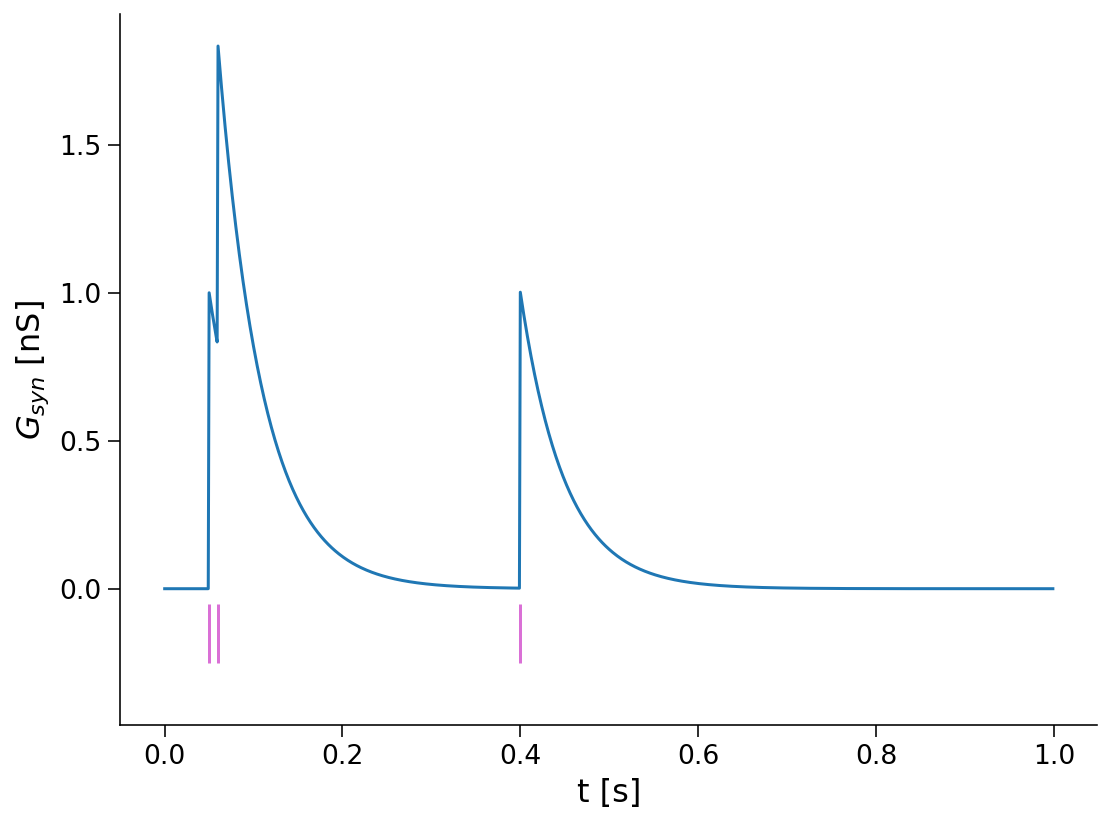

In [4]:
#@title Synaptic conductance in response to spike train
dt = 0.001 #@param {type:"number"}
t_end = 1 #@param {type:"number"}
delta_g_syn = 1E-9 #@param {type:"number"}
tau_syn = 50E-3 #@param {type:"number"}

t = np.arange(0,t_end,dt)
sp = np.zeros(t.size)
sp[50] = 1
sp[60] = 1
sp[400] = 1

@dataclass
class Constants:
    delta_g_syn: float
    tau_syn: float

model_constants = Constants(delta_g_syn,tau_syn)
g_syn = syn(t,sp,model_constants)

_ = plt.plot(t,g_syn*1E9)
_ = plt.xlabel("t [s]")
_ = plt.ylabel("$G_{syn}$ [nS]")
_ = plt.eventplot(t[sp == 1], color='orchid',lineoffsets = -0.15, linelengths=0.2)


## Limitations of the described model for chemical synapses
The model described above for a chemical synapse (the only one that we will look at in this tutorial) has some limitations. Can you discuss below one possible limitation and how you may address it (there is no need to be specific, just phrase in a couple of sentences what mechanisms are missing and how you may address this lack: do you need to introduce extra variables or extra differential equations?).

As an example, such a model causes instantaneous input current in the post-synaptic neuron after a pre-synaptic potential. This is not always the case. As an example, the release of glutamate in the post-synaptic cleft (the most common excitatory neurotransmitter in mammals) can cause an immediate (and very quick - lasting only a few milliseconds) post-synaptic excitation if it binds with AMPA receptors in the post-synaptic neuron. If, instead, glutamate binds to NDMA receptors, it causes a slowly rising and sustained (tens of milliseconds) excitation.

- Discuss another phenomenon that we cannot account for when using a model like the one above for chemical synapses (hint: think about the fact that the properties of the synapse are not allowed to change over long scales)
- Thinking about the AMPA and NDMA example above, reflect on what would be the most *complete* description of what is going on in a chemical synapse. Do we need, in principle, a different model for each synapse or would we need a different model for each neurotrasmitter?

# Neuronal networks
We have more or less all the ingredients we have to simulate a network of neurons but we need to change our perspective.

So far we only considered one single element (a neuron, or a synapse) and solved its dynamics in time from start to end. In a network the same approach cannot work. The future state of a neuron depends on the present state of **the whole network**.

We have to change our perspective then. Instead of a function that returns the $V_m(t)$ for a single neuron from $t_{start}$ to $t_{end}$, we need an **update rule**, a function that updates $V_m(t)$ for the whole netwotk from $t_{i}$ to $t_{i+1}$.

Simulating a neuronal network requires then:
1. Defining a time axis
2. Defining the number of neurons required
3. Defining the model for the neurons (not necessarily the same model for all neurons). This defines:
  - How many constants are required for the model neuron
  - How many variables are required (e.g. for a simple LIF with refractory conductance we will have to store $V_m(t)$ and $G_{ef}(t)$ for all neurons). This means that the more complex is your model, the higher will be the memory consumption of your network.
  - An update rule for all the variables, according to the (differential or not) equations that are part of the model.
4. Defining connectivity matrix between neurons. This defines the number of synapses.
5. A model for the synapses (not necessarily the same model for all synapses), as well as the definition of the type of synapses (excitatory vs inhibitory). Similarly to the model of neurons, this defines:
  - How many constants are required for the synapses
  - How many variables are required (e.g. for a simple conductance based synapse we will have to store only $G_{syn}(t)$ for all synapses).
  - An update rule for all the variables, according to the (differential or not) equations that are part of the model of the synapse.

We are now going to define all of the above and simulate a small network of neurons.


In [ ]:
#@title Definition of network data
# Define the number of neurons
n_neurons = 10#@param {type:"number"}
# Define how many neurons receive direct input from stimulus
perc_stim_modulated_neurons = 20#@param {type:"number"}
# Define percentage of inhibitory neurons
percent_of_inhibhtory_neurons = 20#@param {type:"number"}
# Define probability of connection between neurons (e = excitatory, i = inhibitory)
ee_probability = 0.2#@param {type:"number"}
ei_probability = 0.2#@param {type:"number"}
ie_probability = 0.3 #@param {type:"number"}
ii_probability = 0 #@param {type:"number"}


In [ ]:
#@title Define time axis properties
dt = 0.0001 #@param {type:"number"}
t_end = 1 #@param {type:"number"}
t = np.arange(0,t_end,dt)


In [ ]:
#@title Define model for neuron, we are chosing here a simple LIF with refractory period
c_m = 100E-12 #@param {type:"number"}
g_l = 10E-9 #@param {type:"number"}
e_l = -70E-3 #@param {type:"number"}
e_k = -80E-3 #@param {type:"number"}
v_th = -50E-3 #@param {type:"number"}
tau_ref = 2E-3#@param {type:"number"}
delta_g = 500E-9 #@param {type:"number"}

@dataclass
class NeuronConstants:
    c_m: float
    g_l: float
    e_l: float
    e_k: float
    v_th: float
    tau_ref: float
    delta_g: float

neuron_constants = NeuronConstants(c_m,g_l,e_l,e_k,v_th, \
                             tau_ref,delta_g)

In [ ]:
#@title Define properties of excitatory synapses
delta_g_exc_syn = 10E-9 #@param {type:"number"}
tau_exc_syn = 10E-3 #@param {type:"number"}
v_exc_syn = 0 #@param {type:"number"}

@dataclass
class SynConstants:
    delta_g_syn: float
    tau_syn: float
    v_syn: float

exc_syn_constants = SynConstants(delta_g_exc_syn,tau_exc_syn, \
                                    v_exc_syn)

In [ ]:
#@title Define properties of inhibitory synapses
delta_g_inh_syn = 5E-9#@param {type:"number"}
tau_inh_syn = 50E-3 #@param {type:"number"}
v_inh_syn = -80E-3 #@param {type:"number"}

inh_syn_constants = SynConstants(delta_g_inh_syn,tau_inh_syn, \
                                    v_inh_syn)

In [ ]:
#@title Define stimulus properties and network noise
i_in = 200E-12 #@param {type:"number"}
stim_start = 0.2 #@param {type:"number"}
stim_end = 0.6 #@param {type:"number"}

assert(stim_start >= 0)
assert(stim_end <= t_end)

In [ ]:
#@title Define update rule for neurons
def update_neuron(dt,v_m,g_ref,i_syn,i_in,model_constants):
  ### Inputs:
  ### dt -> time step used in he simulation
  ### v_m -> membrane potential at this time point
  ### g_ref -> refractory conductance at this time point
  ### i_syn -> synaptic current
  ### i_in -> input current at this time
  ### model_constants -> structure containing all the constants for the model
  ### Output:
  ### v_m_upd -> updated membrane potential
  ### g_ref_upd -> updated refractory conductance
  ### sp -> updated spike train

  c_m = model_constants.c_m
  g_l = model_constants.g_l
  e_l = model_constants.e_l
  e_k = model_constants.e_k
  v_th = model_constants.v_th
  tau_ref = model_constants.tau_ref
  delta_g = model_constants.delta_g

  # add poisson noise
  poisson_firing_rate = 3
  i_noise = 0
  if np.random.uniform(0, 1) <= dt*poisson_firing_rate:
    i_noise = 30000E-12

  v_m_upd = v_m + dt/c_m*(g_l*(e_l-v_m) + i_in + i_syn + + i_noise + g_ref*(e_k - v_m))

  g_ref_upd = g_ref - dt*g_ref/tau_ref
  sp = 0
  # add firing
  if v_m_upd >= v_th:
    g_ref_upd = g_ref_upd + delta_g
    sp = 1

  return v_m_upd, g_ref_upd, sp

In [ ]:
# @title Define update rule for synaptic current
def update_synaptic_current(dt, sp, g_syn, v_m_post_synaptic, model_constants):
    ### Inputs:
    ### dt -> time step used in he simulation
    ### sp -> value of spike train in the pre-synaptic neuron at this time point
    ### g_syn -> synaptic conductance at this time point
    ### v_m_post_synaptic -> value of post synaptic membrane potential at this time point
    ### model_constants -> structure containing all the constants for the model
    ### Output:
    ### i_upd -> updated synaptic current
    ### g_syn_upd -> updated synaptic conductance
    delta_g_syn = model_constants.delta_g_syn
    tau_syn = model_constants.tau_syn
    v_syn = model_constants.v_syn

    if sp == 1:
        g_syn_upd = g_syn + delta_g_syn
    else:
        g_syn_upd = g_syn - dt * g_syn / tau_syn

    i_upd = g_syn_upd * (v_syn - v_m_post_synaptic)

    return i_upd, g_syn_upd

In [ ]:
#@title Define simulation data and connectivity matrix

# seed the random number generator to make pseudo-random number generation deterministic
np.random.seed(0)

# number of neurons
n_inhib_neurons = round(n_neurons*percent_of_inhibhtory_neurons/100)
n_exc_neurons = n_neurons - n_inhib_neurons

# number of time steps
n_t_pts = round(t_end/dt)

# mark identity of neurons
is_inhibit_neuron = np.zeros((n_neurons,), dtype=bool)
if n_inhib_neurons != 0:
    is_inhibit_neuron[-n_inhib_neurons:] = True

# network variables
v_m = np.empty((n_neurons,n_t_pts))
g_ref = np.empty((n_neurons,n_t_pts))
sp = np.empty((n_neurons,n_t_pts))
i_input = np.zeros((n_neurons,n_t_pts))
i_syn = np.zeros((n_neurons,n_t_pts))

# define connectivity matrix based on connection probabilities
synapses = np.zeros((n_neurons,n_neurons))
syn_prob = np.zeros((n_neurons,n_neurons))
syn_prob[0:n_exc_neurons-1,0:n_exc_neurons-1] = ee_probability
syn_prob[0:n_exc_neurons-1,n_exc_neurons:] = ei_probability
syn_prob[n_exc_neurons:,0:n_exc_neurons-1] = ie_probability
syn_prob[n_exc_neurons:,n_exc_neurons:] = ii_probability

synapses_list = []
is_inhibit_syn = []
for i in range(n_neurons):
  for j in range(n_neurons):
    if np.random.uniform() < syn_prob[i,j]:
        synapses_list.append([i,j])
        if is_inhibit_neuron[i]:
          is_inhibit_syn.append(True)
          synapses[i,j] = -1
        else:
          is_inhibit_syn.append(False)
          synapses[i,j] = 1

n_synapses = len(synapses_list)
g_syn = np.zeros((n_synapses,n_t_pts))

# define neurons that have stimulus input and their input
neuron_ids = np.random.choice(n_neurons,round(perc_stim_modulated_neurons*n_neurons/100),replace=False)
i_input[neuron_ids,round(stim_start/dt):round(stim_end/dt)] = i_in

In [ ]:
#@title Define initial conditions and run network
# define initial conditions
v_m[:,0] = e_l
g_ref[:,0] = 0
sp[:,0] = 0

# calculate network state over time
for t_i in range(1,n_t_pts):
  # update neurons
  for n_i in range(n_neurons):
    v_m[n_i,t_i], g_ref[n_i,t_i], sp[n_i,t_i] = update_neuron(dt,\
      v_m[n_i,t_i-1],g_ref[n_i,t_i-1],i_syn[n_i,t_i-1],i_input[n_i,t_i-1],\
      neuron_constants)

  # update synapses and synaptic currents
  for s_i in range(n_synapses):
    pre_syn_neuron = synapses_list[s_i][0]
    post_syn_neuron = synapses_list[s_i][1]
    if is_inhibit_syn[s_i]:
      this_syn_constants = inh_syn_constants
    else:
      this_syn_constants = exc_syn_constants

    syn_current, g_syn[s_i,t_i] = update_synaptic_current(dt,\
      sp[pre_syn_neuron,t_i],g_syn[s_i,t_i-1],v_m[post_syn_neuron,t_i],\
      this_syn_constants)
    i_syn[post_syn_neuron,t_i] = i_syn[post_syn_neuron,t_i] + syn_current

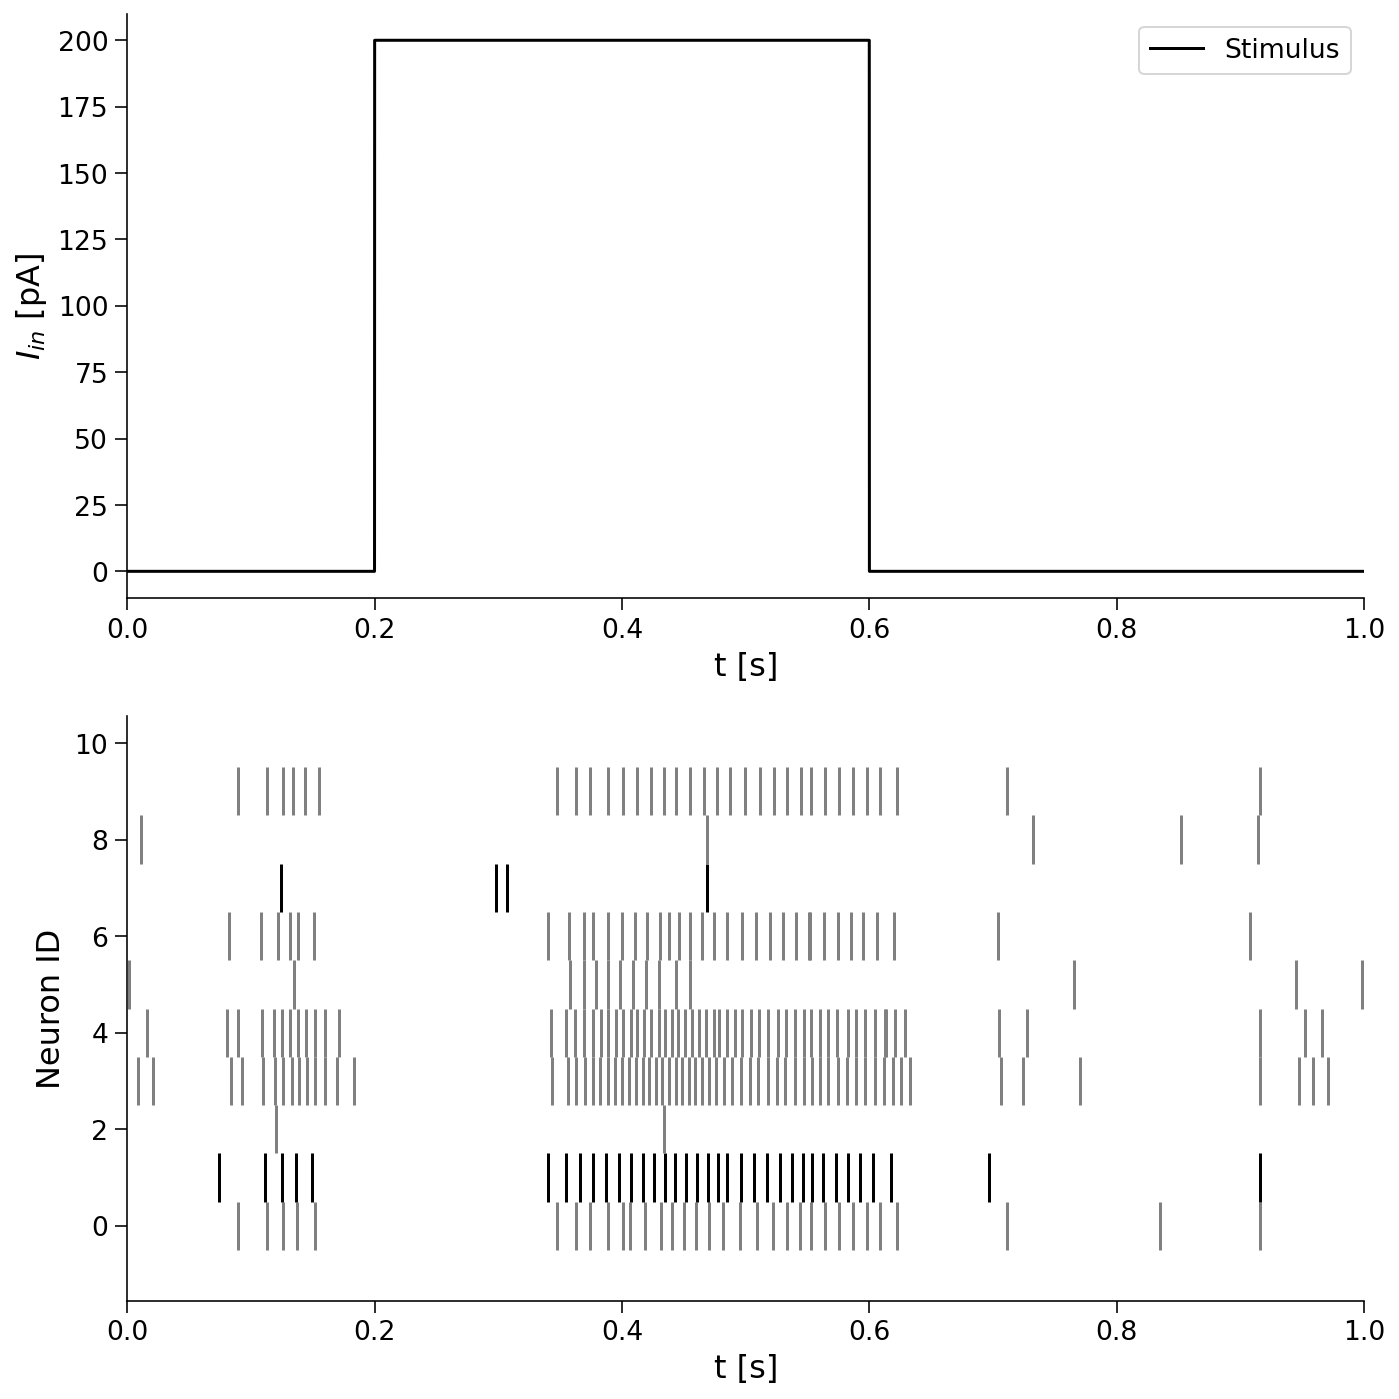

In [ ]:
# @title Plot network activity
spike_raster = []
colors = []
for n_i in range(0, n_neurons):
  spike_raster.append(t[sp[n_i, :] == 1])
  if n_i in neuron_ids:
    colors.append('black')
  else:
    colors.append('grey')

fig, axs = plt.subplots(2, 1, figsize=(10, 10))
if neuron_ids.size > 0:
  axs[0].plot(t, i_input[neuron_ids[0], :] * 1E12, color='black', label="Stimulus")
else:
  axs[0].plot(t, np.zeros_like(t), color='black', label="Stimulus")

axs[0].legend(loc='upper right')
_ = axs[0].set_xlim([0, t_end])
_ = axs[0].set_xlabel("t [s]")
axs[0].set_ylabel("$I_{in}$ [pA]")
axs[1].eventplot(spike_raster, color=colors, linelengths=1)
axs[1].set_ylabel("Neuron ID")
_ = axs[1].set_xlabel("t [s]")
_ = axs[1].set_xlim([0, t_end])

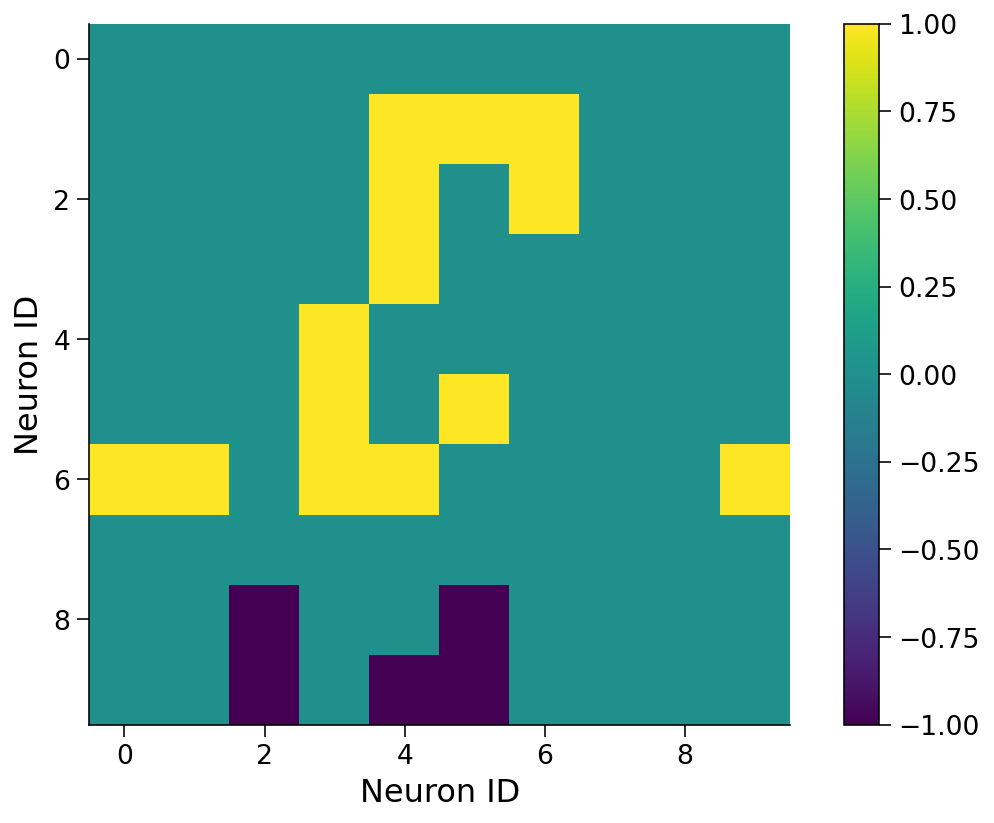

In [ ]:
# @title Plot connectivity matrix
plt.figure()
_ = plt.imshow(synapses)
_ = plt.colorbar()
_ = plt.xlabel("Neuron ID")
_ = plt.ylabel("Neuron ID")

## Discussion
- In this network (with the default values), neuron 1 and 7 are the ones directly stimulated by the input. Their response, however, is definitely not similar. Can you comment on the reason? What happens if you remove the connection between all neurons in the network? This is a typical example of why we need to "write" in our networks, as you have seen in the experimental part of this course, to understand what is the reason underlying some dynamics.
- What happens if you change the number of inhibitory neurons in the network?
- What happens if you remove the input from the network? Can you comment on the network's activity in those conditions and the connectivity between neurons?